# Data Readiness
--------------

In [42]:
# --------------------
# Import Libraries
# --------------------
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

#### Reading The Cleaned Dataset

In [11]:
# --------------
# Read The Data
# --------------
data = pd.read_csv('../data/processed/mentalhealthData_Cleaned.csv')

#### Exploring the Dataset Structure

In [12]:
# --------------------
# Dataset Information
# --------------------
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290051 entries, 0 to 290050
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   gender                   290051 non-null  object
 1   country                  290051 non-null  object
 2   occupation               290051 non-null  object
 3   self_employed            290051 non-null  object
 4   family_mh_history        290051 non-null  object
 5   sought_treatment         290051 non-null  object
 6   days_spent_indoors       290051 non-null  object
 7   noticed_growing_stress   290051 non-null  object
 8   noticed_habit_changes    290051 non-null  object
 9   personal_mh_history      290051 non-null  object
 10  mood_swings              290051 non-null  object
 11  coping_difficulty        290051 non-null  object
 12  work_engagement          290051 non-null  object
 13  social_difficulty        290051 non-null  object
 14  disclose_mh_to_emplo

#### Exploring The Statistics

In [17]:
data.describe(include='object')

,gender,country,occupation,self_employed,family_mh_history,sought_treatment,days_spent_indoors,noticed_growing_stress,noticed_habit_changes,personal_mh_history,mood_swings,coping_difficulty,work_engagement,social_difficulty,disclose_mh_to_employer,care_options_awareness
count,290051,290051,290051,290051,290051,290051,290051,290051,290051,290051,290051,290051,290051,290051,290051,290051
unique,2,35,5,3,2,2,5,3,3,3,3,2,3,3,3,3
top,Male,United States,Housewife,No,No,Yes,1-14 Days,Maybe,Yes,No,Medium,No,No,Maybe,No,No
freq,237900,169112,65906,255711,175518,146184,63113,99300,108788,103313,100384,153031,105012,102577,229889,117614


In [19]:
data.columns

Index(['gender', 'country', 'occupation', 'self_employed', 'family_mh_history',
       'sought_treatment', 'days_spent_indoors', 'noticed_growing_stress',
       'noticed_habit_changes', 'personal_mh_history', 'mood_swings',
       'coping_difficulty', 'work_engagement', 'social_difficulty',
       'disclose_mh_to_employer', 'care_options_awareness',
       'self_employed_missing'],
      dtype='object')

# Data Analysis
--------------

#### Distribution of Datapoints

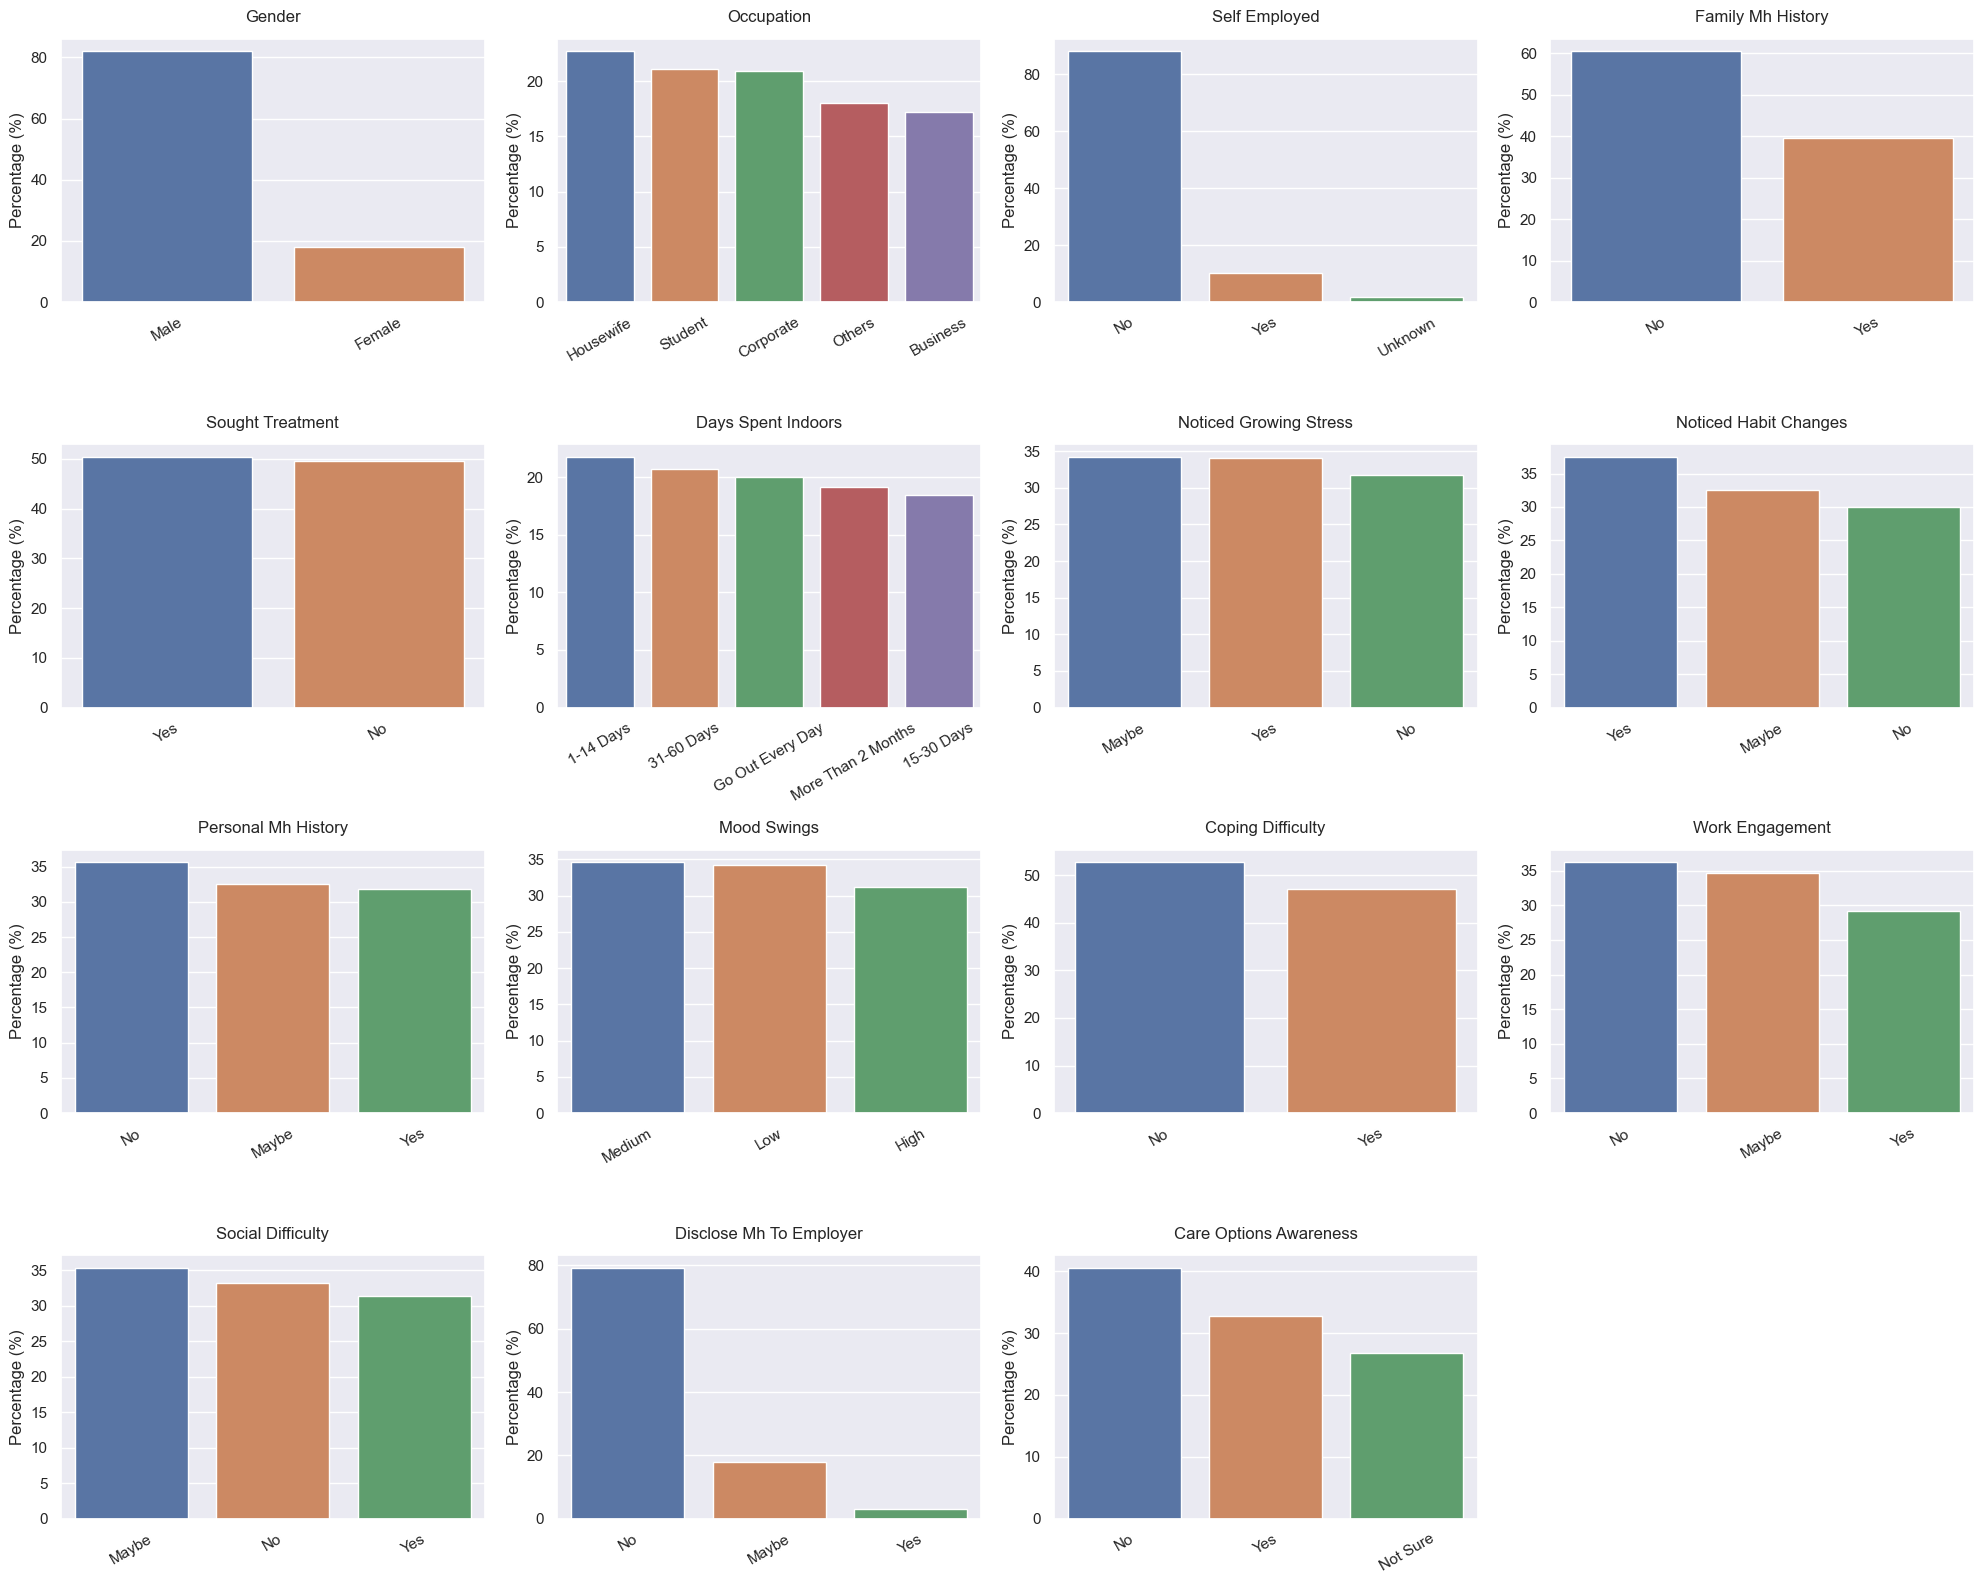

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select object columns excluding 'country'
cols = [col for col in data.select_dtypes(include='object').columns if col != 'country']

# Compute rows/columns for subplots
n_cols = 4
n_rows = math.ceil(len(cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 4 * n_rows))
axes = axes.flatten()

for ax, col in zip(axes, cols):
    # Compute percentages
    counts = data[col].value_counts(normalize=True) * 100
    
    # Plot as bar chart using x as hue to satisfy v0.14
    sns.barplot(x=counts.index, y=counts.values, hue=counts.index, dodge=False, ax=ax, legend=False)
    ax.set_title(col.replace('_', ' ').title(), pad=12)
    ax.set_ylabel('Percentage (%)')
    ax.set_xlabel('')
    ax.tick_params(axis='x', rotation=30)

# Remove unused subplots
for ax in axes[len(cols):]:
    ax.remove()

plt.tight_layout()
plt.show()


#### Domain Analysis Questions

In this phase, we aim to explore patterns in the dataset that relate to mental health indicators, behaviors, and workplace dynamics. The following questions guide our analysis:

1. Family History and Mental Health
How many people with a family history of mental health issues report or suspect they have mental health problems? What is the distribution of “Yes” or “Maybe” responses among these individuals?

2. Time Indoors and Mental Health
Is there a relationship between spending many days indoors and experiencing mental health issues such as growing stress, noticeable habit changes, or mood swings?

3. Treatment and Disclosure
Are individuals who seek treatment more likely to disclose their mental health issues to employers?

4. Patterns in Disclosure
Are there identifiable patterns among people who disclose mental health issues to employers?

5. Occupation and Work Engagement
Which occupations show higher levels of work engagement?

6. Coping Difficulty and Mental Health Indicators
Do individuals reporting higher coping struggles also experience greater mood swings, habit changes, or personal mental health history?

7. Social Difficulty and Work Engagement
How does social weakness influence work engagement and the likelihood of seeking treatment?

8. Self-Employment and Mental Health Awareness
How does self-employment status relate to awareness of care options and likelihood of seeking treatment?

9. Clustering of Mental Health Profiles
Can we identify clusters of individuals based on combinations of stress, coping difficulty, and work engagement, revealing distinct mental health profiles?

10. Demographics and Mental Health Awareness
Do gender, country, or occupation influence the likelihood of noticing growing stress or habit changes, suggesting demographic patterns in mental health experiences?